# **Mountain Lee Waves - EAS 4610 Final Project**
Jacob Hinson and Maddie Richardson
https://youtu.be/i0xdtwiXfpM

## **Introduction**

Lee waves are produced due to orographic lifting and form downwind of mountains. This means that when air flow hits a mountain, it is forced to rise over the mountain, and this triggers perturbations downstream from the mountain. Lee waves can be responsible for forming lenticular clouds, which are unique stationary clouds, and form when moisture condenses at the crests of lee waves. It is important to understand lee wave formation and propagation because they can be dangerous for aircraft because they can cause clear-air-turbulence. They can also lead to extremely strong winds on the lee side of mountains, also known as downslope winds, that can be dangerous to fly through or can damage structures.  

In our project, we are focusing on linear mountain-wave theory which assumes that the mountain is small compared to the vertical wavelength of the lee wave formed. There are other ways to model mountain waves using nonlinear theory, but for the purpose of this class, linear was chosen given time limitations. We chose to use the Crank-Nicholson scheme to approximate solutions for our waves given our chosen initial conditions. Our initial condition at the surface is h, which is the topography of the mountain range at the surface. We assume that we are observing a sinusoidal mountain range. Our upper boundary was chosen based on the decreasing density of the atmosphere with height. The troposphere is the only portion of the atmosphere where weather occurs, and it only reaches 9km from the surface at 50°N/S, so we assumed our top boundary would be 9km seeing as lee waves would not propagate past this point. This differs from other models as they use z→∞ as a boundary. We chose to assume that perturbation energy goes to zero as z approaches 9km.


## **Main Equation**

2-D Boussinesq flow theory was used to model lee wave formation for this project. This approximation is based on buoyancy and the incompressibility of air. The fluid, or air in this case, abides by conservation of mass, conservation of momentum, and the conservation of energy. The air does not want to be perturbed from its initial state, and it also can transmit energy given the right conditions. Considering all this, the final linear mountain-wave theory equation modeled in this project is:

## $$ \frac{\partial^2w}{\partial x^2} + \frac{\partial^2w}{\partial z^2} + \ell^2 w= 0$$
Where w is the vertical velocity of air, x is the horizontal distance of wave propagation in km, z is the height of vertical wave propagation in km, and l is:
## $$ \ell^2 = \frac{N^2}{U^2}-\frac{1}{U}\frac{d^2 U}{dz^2} $$
l is the scorer parameter, N is the buoyancy frequency in 1/s, U is the speed of the basic state flow in m/s. We assume that friction is negligible at the surface and that the velocity normal to the topography goes to zero at the surface. The surface condition boundary condition is z = h(x) and the upper boundary condition, as mentioned before, is 9km, where we assume that perturbation energy goes to zero. This means that the equation for w at the surface becomes:
## $$ w(x, 0) = U \frac{\partial h}{\partial x} $$
We chose to make the surface topography follow the function given in Durran (1986) to more closely match the graphs in Durran (2003). The only difference is in the derivative sin or cos for the boundary conditions.
## $$h(x) = h_0cos(kx) $$
We also assume that U and N remain constant with height, so that they do not need to be changed as we iterate through solving the PDE. If h(x) equals what is written above, carrying out the RHS of w(x, 0) would become:
## $$ w(x, 0) = -U h_0 k sin(kx) $$
Let's import the packages and start taking a look at the analytical solutions in order to explain the nuances of this problem further.

In [1]:
# Code by Jacob Hinson and Maddie Richardson

# Importing packages
import numpy as np
import matplotlib.pyplot as plt

# Getting x and z vectors initialized
dx = 1
xf = 100
x = np.arange(0, xf+1, dx)

dz = 1
zf = 10
z = np.arange(0, zf+1, dz)
n = len(z)

U = 15     # speed of basic-state flow, m/s^2
N = 0.01   # bouyancy frequency, 1/s
l = N / U  # Scorer parameter
k = 0.5    # horizontal wavenumber
h0 = 0.1   # horizontal wavelength for topography
mu = np.sqrt(k**2 - l**2)

The solutions for vertical velocity then depend on the values of the Scorer parameter (l) and the horizontal wavenumber (k).

## $$ \ell < k:    w(x, z) = -U h_0 ke^{-\mu z} sin(kx) $$
For the case where l < k, then Uk > N by definition and the waves will decay with height. This is because energy dissipates with height since the intrinsic frequency of the wave is much higher than the buoyancy frequency, meaning that buoyancy restoring forces dissipate with height.
### **Analytical Solution for Energy Dissipation with Height (l < k)**

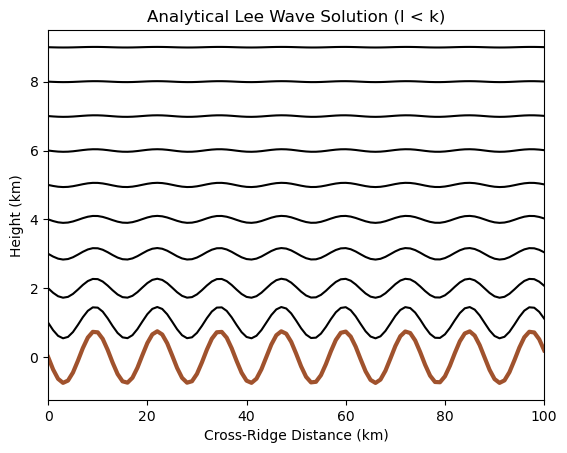

In [2]:
# The vertical velocity satisfying the initial equation of flow and the upper and lower boundary conditions
# This is the equation seen above
def omega(z, x):
    return -U * h0 * k * np.exp(-mu*z) * np.sin(k*x)

# creating a blank matrix to store all values in
omegalist = np.zeros([len(z), len(x)])

# iterating through and filling our matrix given the initial lower boundary condition
for i in np.arange(0, len(z), 1):
    for j in np.arange(0, len(x), 1):
        omegalist[i, j] = omega(z[i], x[j]) + z[i]

# Plotting the results
for i in range(n-1):
    plt.plot(x, omegalist[i, :], color='black') # plotting streamlines    
    while i == 0:
        plt.plot(x, omegalist[i, :], color='sienna', linewidth=3) # plotting ground
        break
plt.title('Analytical Lee Wave Solution (l < k)')
plt.xlabel('Cross-Ridge Distance (km)')
plt.ylabel('Height (km)')
plt.margins(x=0)
plt.show()

This looks good. The waves flow over the lower surface denoted by the thicker brown line. However, what if we have the opposite scenario, where the Scorer parameter (l) is greater than the horizontal wavenumber (k)?

If l > k, then Uk < N by definition and the waves propagate vertically, maintaining their amplitude because the intrinsic frequency of the waves is smaller than the buoyancy frequency, meaning that buoyant forcings support these oscillations with height. This is easier explained with pressure perturbations. A wave tilting upstream (to the left) produces high pressure upwind (left) and low pressure downwind (left) of the ridges. This means the air is exterting a force on the terrain in the direction of flow (downstream), which then is exterted back on the wind in the opposite direction (upstream), decelerating the flow.

This is denoted with the equation below, a result of trigonometric identities to write the general solution to the first equation presented (Durran, 1986). The direction of the propagation can be flipped by flipping the sign in the sine term.

## $$ \ell > k:    w(x, z) = -U h_0 k sin(kx+vz) $$
### **Analytical Solution for Energy Propagation Upstream (l > k)**

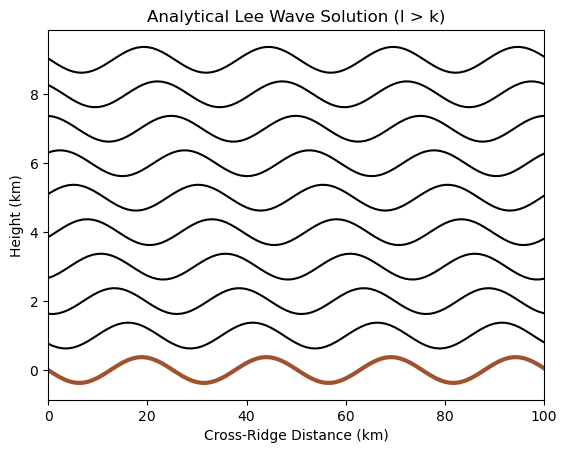

In [3]:
# we need to change some initial parameters of the equation to get the waves to look how we want
U = 15      # speed of basic-state flow, m/s^2
N = 0.01    # bouyancy frequency, 1/s
k = 0.00025 # horizontal wavenumber
h0 = 100    # horizontal wavelength for topography
l = np.sqrt(N**2 / U**2)
v = (l - k**2)**(1/2)

# The vertical velocity satisfying the initial equation of flow and the upper and lower boundary conditions
# This is the equation seen above
def omega(z, x):
    # the multiplication factors are a requirement
    return -U * h0 * k * np.sin(k*x*1000 + v*z*1000)

# creating a blank matrix to store all values in
omegalist = np.zeros([len(z), len(x)])

# iterating through and filling our matrix given the initial lower boundary condition
for i in np.arange(0, len(z), 1):
    for j in np.arange(0, len(x), 1):
        omegalist[i, j] = omega(z[i], x[j]) + z[i]

# Plotting the results
for i in range(n-1):
    plt.plot(x, omegalist[i, :], color='black') # plotting streamlines    
    while i == 0:
        plt.plot(x, omegalist[i, :], color='sienna', linewidth=3) # plotting ground
        break
plt.title('Analytical Lee Wave Solution (l > k)')
plt.xlabel('Cross-Ridge Distance (km)')
plt.ylabel('Height (km)')
plt.margins(x=0)
plt.show()

## **Numerical Methods**

We used the Crank Nicholson finite differencing method, which is a blend of Forward and Backward Euler, to solve our PDE. We used Dirichlet boundary conditions given that they were provided in the sources we used. The Crank-Nicholson method is unconditionally stable for all values of C_d, or the diffusion number. We chose to use it because it tends to be more accurate than the Backward Euler method. Below we will solve the analytical solutions to the equations given in Durran (2003) and Durran (1986).


## **Solving the PDE with the Crank-Nicholson Method**

In [4]:
import numpy as np
from scipy.sparse import diags, eye
import matplotlib.pyplot as plt

def wavefunc(x0, xf, h0, k, U, N, surf, plot):
    global w, x, n
    # generic help function to guide user creation of plots
    #if hlp == 'help':
    #    print(f'Lee Wave Creator (x0={x0}, xf={xf}, h0={h0}, k={k}, U={U}, N={N}, surf={surf})\nRecommended Parameters:\nFor sinusoidal surface, k=0.5, h=0.1\nFor ridge, x0=-50, xf=100, k=0.1, h=1\n')
       
    # Parameters
    dx = 1
    x = np.arange(x0, xf+dx, dx)

    dz = 1
    zf = 10
    z = np.arange(0, zf, dz)
    n = len(z)

    l2 = N**2 / U**2
    m = 1000 # this is the horizontal wavelength
    l = np.sqrt(N**2 / U**2)    
    
    # Initial and boundary conditions
    # BC for l > k
    if surf == 'sin' and l > k:
        print('Surface Topography = Sinusoidal, l > k')
        v = np.sqrt((l - k**2))
        BC = np.zeros([n, len(x)])
    
        for zz in np.arange(0, zf, dz):
            for xx in np.arange(0, xf+1, dx):
                kx = k * x[xx] * 1000
                mz = m * z[zz] * v
                BC[zz, xx] = (-U * h0 * k * (np.sin(kx + mz))) # flipping the sign in the sin function changes propagation direction
                
        if plot == 'plot':        
            # plots the boundary conditions so that you can see what's being added to the waves        
            for i in np.arange(0,9,1):
                plt.plot(x, BC[i, :])
                plt.title('Boundary Conditions for l > k')
                plt.xlabel('Cross-Ridge Distance (km)')
                plt.ylabel('Height (km)')
                plt.margins(x=0)
            plt.show()
        elif plot != 'plot':
            pass
      
        w = np.zeros([n, len(x)])
        w[:, :] = BC[:, :]
    
    # BC for l < k
    if surf == 'sin' and l < k:
        print('Surface Topography = Sinusoidal, l < k')
        surfaceBC = (-U * h0 * k * np.sin(k * x)) + z[0]
        
        topBC = np.zeros(len(x))
        w = np.zeros([n+1, len(x)])
        w[0, :] = surfaceBC
        w[-1, :] = topBC        

    # Coefficient calculations for the finite differencing discretization
    # These are similar to M1 and M2 from Problem Set 5
    alpha = dz**2 / (4*dx**2)
    beta = dx**2 / (4*dz**2)

    # Crank-Nicolson coefficients
    # X-direction coefficients for second derivative
    C1 = -alpha * np.ones(xf-1)
    C2 = 1 + 2 * alpha + l2
    C3 = -alpha * np.ones(xf-1)

    # Z-direction coefficients for second derivative
    D1 = beta * np.ones(xf-1)
    D2 = 1 - 2 * beta - l2
    D3 = beta * np.ones(xf-1)

    # Constructing the matrices
    # This assembles the tridiagonal sparse matrix of our C_d's in requisite fashion
    A = diags([C1, C2, C3], [-1, 0, 1], shape=(xf-1, xf-1))
    B = diags([D1, D2, D3], [-1, 0, 1], shape=(xf-1, xf-1))

    # Identity matrix the size of our xf
    I = eye(xf-1)

    # Time-stepping using Crank-Nicolson based on l and k
    if surf == 'sin' and l < k:
        for i in range(1, n):
            rhs = (I - 0.5*A) @ w[i-1, 1:xf] + 0.5*B @ w[i-1, 1:xf]
            w[i, 1:xf] = np.linalg.solve((I + 0.5*A).toarray(), rhs)
            
    if surf == 'sin' and l > k:
        for i in range(1, n):
            # A removal of the "i-1" is required here in order to point the array to the current condition
            # It is looking "back" so to speak because of how we indexed it
            # This introduces some instability horizontally near the edges
            rhs = (I - 0.5*A) @ w[i, 1:xf] + 0.5*B @ w[i, 1:xf]
            w[i, 1:xf] = np.linalg.solve((I + 0.5*A).toarray(), rhs)
            
    # Adding height terms
    for e in range(0, zf):
        w[e, :] += z[e]
    if plot == 'plot':    
        # Plotting the results
        for i in range(n):
            plt.plot(x, w[i, :], color='black') # plotting streamlines
            while i == 0:
                plt.plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
                break
        plt.title(f'Crank-Nicholson Lee Wave (l = {l:0.1}, k = {k:0.1})')
        plt.xlabel('Cross-Ridge Distance (km)')
        plt.ylabel('Height (km)')
        plt.margins(x=0)
        plt.show()
    elif plot != 'plot':
        pass
    

Above is the code for the Crank-Nicholson solver. It implements some conditionals for the different cases where instability may occur, such as sectioning the boundary conditions off by the relationship between l and k. It also breaks down the matrix creation and does it outside of the for loop to speed up processing time.

## **Results**

Surface Topography = Sinusoidal, l < k


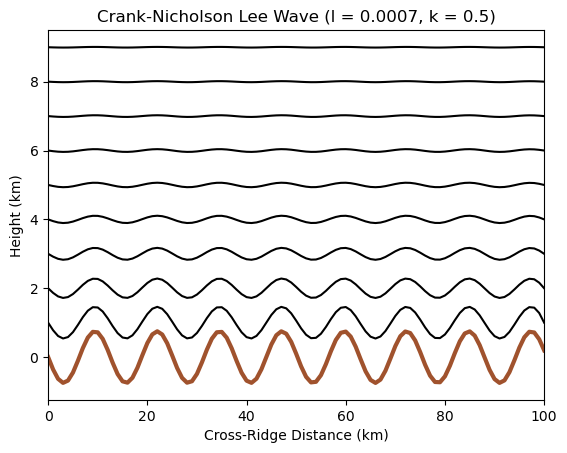

Surface Topography = Sinusoidal, l > k


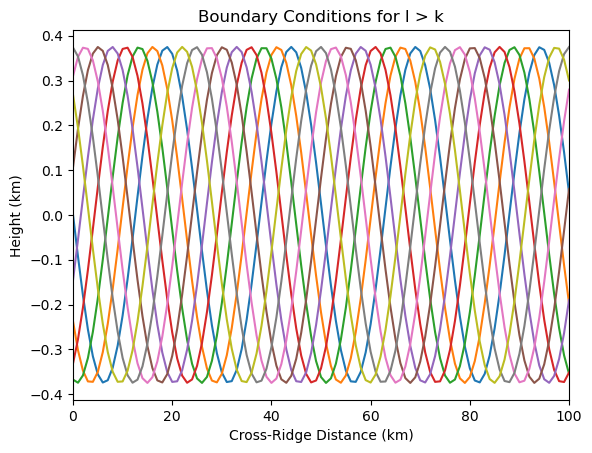

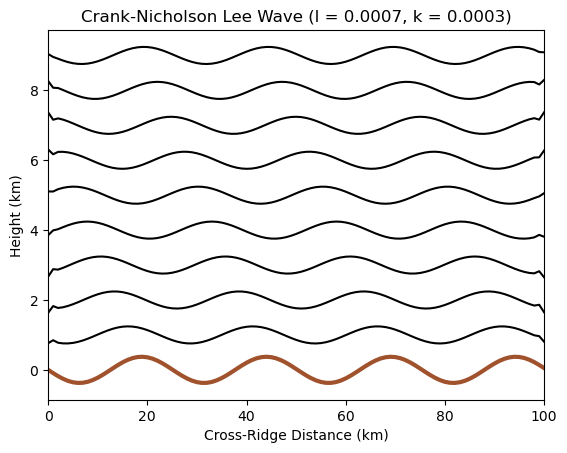

In [5]:
wavefunc(0, 100, 0.1, 0.5, 15, 0.01, 'sin', 'plot')
wavefunc(0, 100, 100, 0.00025, 15, 0.01, 'sin', 'plot')

These are the comparison simulations run with the model in order to compare it to the analytic solution. The comparison is very good. Both the cases presented look nearly identical to the original analytical plots. The only instability is with the l > k case at the very edges. We believe this is due to an indexing error due to the changes we made to get it to look at the current height. It needs to do this because the boundary condition is applied at every z level, and looking at the previous level's boundary condition is doing it no good if the boundary relies on the current level. This explains the plot of the multicolored sine waves, all of which are being added to a certain level as the "starting" condition.

Some testing was required to get the model to behave properly. The parameters for k and h0 are not listed in the paper and cannot be easily inferred based on U and N, the only two given quantities. This is why the second case (l > k) has been multiplied by 1000. Some of the units must be interfering, and due to the model being set up to work in km, not m, we cannot change the parameters by themselves.

In order to showcase the model's capabilities, below are some graphs illustrating changes in parameters with explanations following. Due to how it is set up, nothing can be changed about the grid spacing. The domain can be expanded, but dz and dx cannot be changed or else the code will break. We did not have time to code in resilience to changes in the gridsteps.
## **Other Figures**

Surface Topography = Sinusoidal, l < k
Surface Topography = Sinusoidal, l < k
Surface Topography = Sinusoidal, l < k


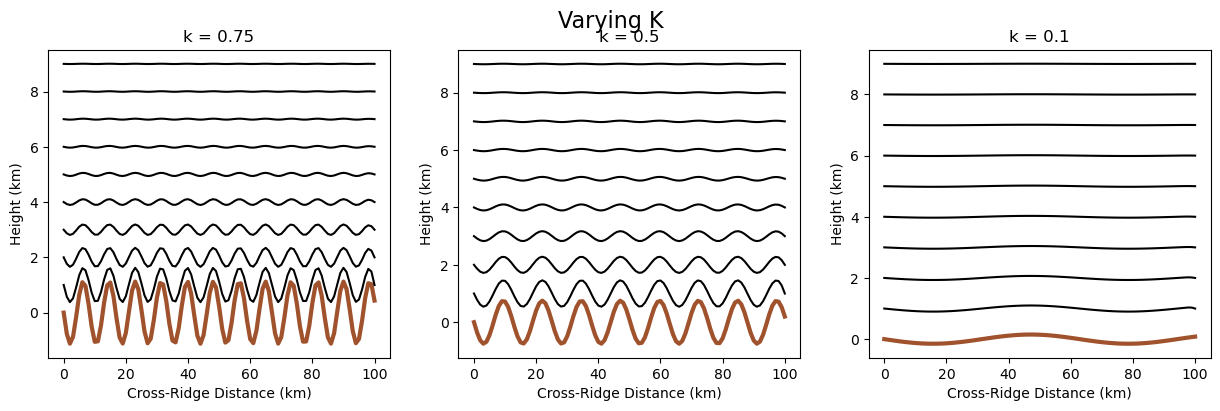

In [6]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Varying K', fontsize=16)

wavefunc(0, 100, 0.1, 0.75, 15, 0.01, 'sin', 'no')
ax[0].set_title('k = 0.75')
ax[0].set_xlabel('Cross-Ridge Distance (km)')
ax[0].set_ylabel('Height (km)')
for i in range(n):
    ax[0].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[0].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 0.1, 0.5, 15, 0.01, 'sin', 'no')
ax[1].set_title('k = 0.5')
ax[1].set_xlabel('Cross-Ridge Distance (km)')
ax[1].set_ylabel('Height (km)')
for i in range(n):
    ax[1].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[1].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 0.1, 0.1, 15, 0.01, 'sin', 'no')
ax[2].set_title('k = 0.1')
ax[2].set_xlabel('Cross-Ridge Distance (km)')
ax[2].set_ylabel('Height (km)')
for i in range(n):
    ax[2].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[2].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

plt.show()

This shows what happens when k is varied while all other parameters stay the same.

Surface Topography = Sinusoidal, l < k
Surface Topography = Sinusoidal, l < k
Surface Topography = Sinusoidal, l < k


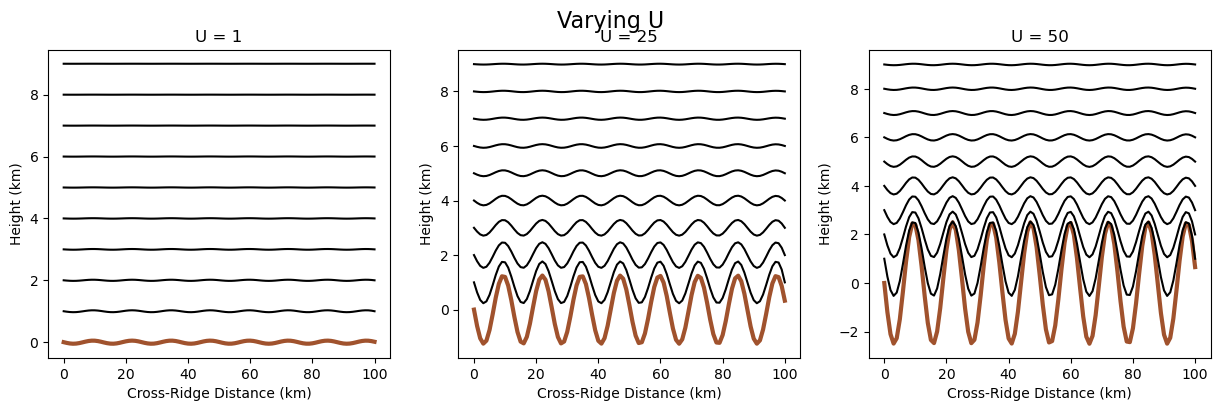

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Varying U', fontsize=16)

wavefunc(0, 100, 0.1, 0.5, 1, 0.01, 'sin', 'no')
ax[0].set_title('U = 1')
ax[0].set_xlabel('Cross-Ridge Distance (km)')
ax[0].set_ylabel('Height (km)')
for i in range(n):
    ax[0].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[0].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 0.1, 0.5, 25, 0.01, 'sin', 'no')
ax[1].set_title('U = 25')
ax[1].set_xlabel('Cross-Ridge Distance (km)')
ax[1].set_ylabel('Height (km)')
for i in range(n):
    ax[1].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[1].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 0.1, 0.5, 50, 0.01, 'sin', 'no')
ax[2].set_title('U = 50')
ax[2].set_xlabel('Cross-Ridge Distance (km)')
ax[2].set_ylabel('Height (km)')
for i in range(n):
    ax[2].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[2].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

plt.show()

While varying U, we can see that the propagation of waves depends on the mean flow velocity at any given time. The higher U goes, the larger the initial oscillations become and the larger the subsequent flows get.

Surface Topography = Sinusoidal, l > k
Surface Topography = Sinusoidal, l > k
Surface Topography = Sinusoidal, l > k


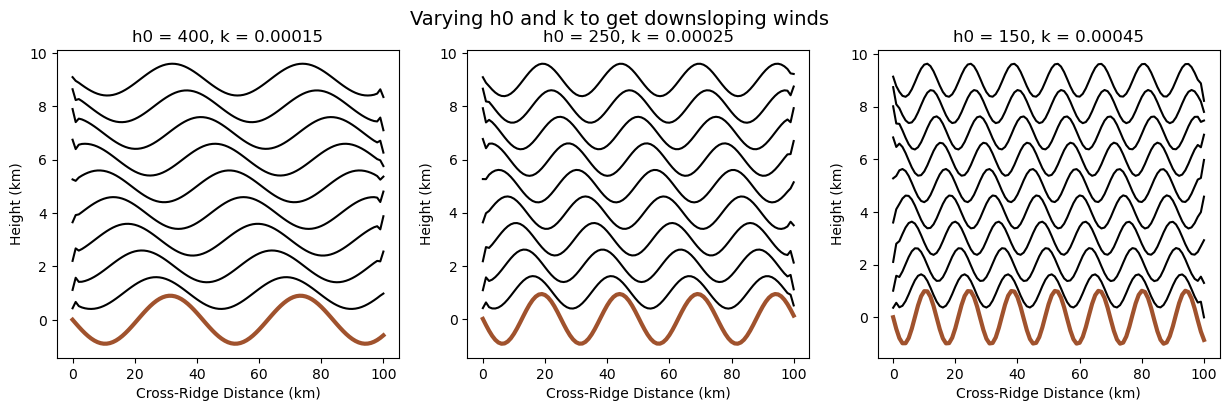

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
fig.suptitle('Varying h0 and k to get downsloping winds', fontsize=14)

wavefunc(0, 100, 400, 0.00015, 15, 0.01, 'sin', 'no')
ax[0].set_title('h0 = 400, k = 0.00015')
ax[0].set_xlabel('Cross-Ridge Distance (km)')
ax[0].set_ylabel('Height (km)')
for i in range(n):
    ax[0].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[0].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 250, 0.00025, 15, 0.01, 'sin', 'no')
ax[1].set_title('h0 = 250, k = 0.00025')
ax[1].set_xlabel('Cross-Ridge Distance (km)')
ax[1].set_ylabel('Height (km)')
for i in range(n):
    ax[1].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[1].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

wavefunc(0, 100, 150, 0.00045, 15, 0.01, 'sin', 'no')
ax[2].set_title('h0 = 150, k = 0.00045')
ax[2].set_xlabel('Cross-Ridge Distance (km)')
ax[2].set_ylabel('Height (km)')
for i in range(n):
    ax[2].plot(x, w[i, :], color='black') # plotting streamlines
    while i == 0:
        ax[2].plot(x, w[i, :], color='sienna', linewidth=3) # plotting ground
        break

plt.show()

This demonstration was done to show how downslope windstorms can happen when the Scorer parameter is greater than the horizontal wavelength. Windspeed inscreases where the streamlines are closer together, and we can see that happening on the lee side of the ridges. This phenomenon can extend all the way down the face of the lee side of a ridge and then jump back up in what's termed a "hydraulic jump". This specific phenomenon was what was responsible for the rapid spread of the Maui wildfires, as the lee side of the island was subjected to a large downsloping wind event.

## **Conclusions**
The model is obviously quite sensitive to parameter changes. The horizontal wavenumber (k) is an incredibly sensitive parameter. Some parameters, like the buoyancy frequency (N), are not sensitive to change at all. This is perhaps due to it being so small to begin with, then squared on top of that. The model performs well in the cases that we have tested it in. Obviously, instability can be found.

If U is greater than 50 m/s, the surface topography will intersect with streamlines. In the future, we would like to see an expansion of the gridsteps and the ability to plot more lines. Unfortunately, this lay outside of the timeframe of this project.

In an effort for transparency on the part of the authors, some attempts at solutions were made without matricies and are left as a proof of concept. This was done via a hand derivation of the discretizations necessary to step through for the first equation mentioned in the paper. The derivation may have not been completely correct, as in theory, it should work.
#### **Hand Derivation of Discretization - For Loop Solution Attempt**

(8, 101)


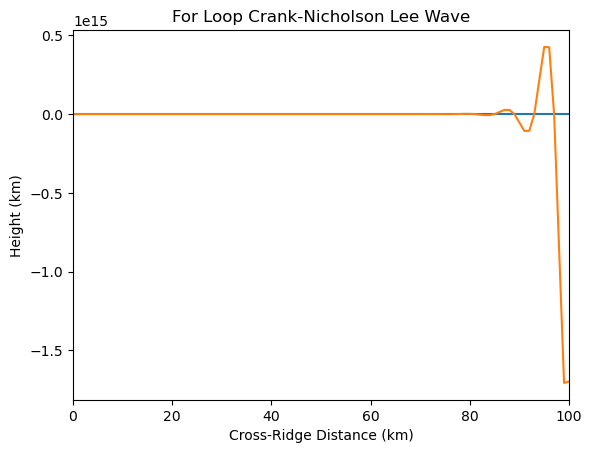

In [9]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

dx = 1
xf = 100
x = np.arange(0, xf+1, dx)

dz = 1
zf = 9
z = np.arange(0, zf-1, dz)
n = int(zf/dz)

h0 = 0.5
k = 0.1
U = 15
N = 0.01
l2 = N**2 / U**2

surfaceBC = (U * h0 * k * np.cos(k * x)) + z[0]
    
topBC = np.zeros(len(x))

w = np.zeros([n-1, len(x)])
print(np.shape(w))
w[0, :] = surfaceBC 
w[-1, :] = topBC

denom = (1/(dx)**2) + (1/(dz)**2)

for i in np.arange(1, 8, 1): # z pos
    for j in np.arange(0, 100, 1): # x pos
        w[i, j+1] = ((( 2*(denom)) + (l2) ) / (1/(dz**2))) * ((w[i, j]/2) - (w[i-1, j]/(2*(dx**2))) + (w[i, j+1]/(2*(dz**2))) - (w[i, j-1]/(2*(dx**2))))


plt.plot(x, w[0, :])
plt.plot(x, w[1, :])
plt.title('For Loop Crank-Nicholson Lee Wave')
plt.xlabel('Cross-Ridge Distance (km)')
plt.ylabel('Height (km)')
plt.margins(x=0)
plt.show()

Only two lines are plotted as the solution exhibits instability with each following line being orders of magnitude larger than the last.